In [1]:
import urllib
import os
from urllib.request import urlopen
import numpy as np
from IPython.display import display, Image
import socket
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image, ImageFile
import tensorflow as tf
import imageio
import random
import time
socket.setdefaulttimeout(10)

## 1) Загрузка картинок и очистка от мусора

In [2]:
path_root = './data'
path_data_original = '/data_original'
path_data_training = '/data_training'
path_imagenet_resources = './data/imagenet_resources'

In [3]:
classes = {'bottle':0,'headphones':1,'human':2,'key':3,'laptop':4,'pen':5,'phone':6,'shoes':7,'sodacan':8,'wallet':9}
classes

{'bottle': 0,
 'headphones': 1,
 'human': 2,
 'key': 3,
 'laptop': 4,
 'pen': 5,
 'phone': 6,
 'shoes': 7,
 'sodacan': 8,
 'wallet': 9}

In [4]:
#shoes 7935 - мусор

In [4]:
def downloadClassFromImagenet(className):
    flag_allokwithdir = False
    try:
        os.mkdir(path_root+path_data_original+'/'+className)
        flag_allokwithdir = True
    except FileExistsError:
        flag_allokwithdir = True
    except:
        flag_allokwithdir = False
    if (flag_allokwithdir):
        destination_default = path_root+path_data_original+'/'+className+'/imagenet'+className
        i = 0
        path_to_class_resources = path_imagenet_resources+'./'+className
        for file in os.listdir(path_to_class_resources):
            f = open(path_to_class_resources+'./'+file,'r',encoding='utf-8')
          #  print(f)
            for line in f:
                try:
                    destination = destination_default+str(i)+'.jpg'
                    url = line#.rstrip()
                 #   print(url)
                 #   if (url == 'http://i19.tinypic.com/497rjno.jpg'):
                 #       print('----------------------')
                 #   print(destination)
                    urllib.request.urlretrieve(url, destination)
                  #  print('here')
                    try:
                        img=mpimg.imread(destination)
                        Image.open(destination).convert('RGB')
                        if (os.path.getsize(destination)<13102): #мусор (размер в байтах) (надо 15kb или 14.5kb)
                            os.remove(destination)
                            i -= 1
                    #        print('мусор')
                    except: #пустая картинка
                        os.remove(destination)
                        i -= 1
                  #      print('пустая картинка')
                except: #проблемы с url (404,403)
                    i -= 1
                 #   print('проблемы с url')
                i += 1
                #print(i)
            f.close()
            print(file)
            print(i)

In [5]:
downloadClassFromImagenet('shoes')

imagenet.wnid=n02855701.shoes.txt
226


C:\Users\Klapeyron\Anaconda3\envs\tensorflow-gpu\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))


imagenet.wnid=n02873520.shoes.txt
751
imagenet.wnid=n02873733.shoes.txt
1569
imagenet.wnid=n02904927.shoes.txt
2190
imagenet.wnid=n02925666.shoes.txt
2706
imagenet.wnid=n03025250.shoes.txt
3218
imagenet.wnid=n03027625.shoes.txt
3753
imagenet.wnid=n03047690.shoes.txt
4328
imagenet.wnid=n03361550.shoes.txt
4829
imagenet.wnid=n03472535.shoes.txt
4954


C:\Users\Klapeyron\Anaconda3\envs\tensorflow-gpu\lib\site-packages\PIL\TiffImagePlugin.py:742: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


imagenet.wnid=n03680355.shoes.txt
5326
imagenet.wnid=n03776877.shoes.txt
5476
imagenet.wnid=n03798061.shoes.txt
5633
imagenet.wnid=n03868406.shoes.txt
6062
imagenet.wnid=n04022332.shoes.txt
6551
imagenet.wnid=n04120489.shoes.txt
7530
imagenet.wnid=n04239786.shoes.txt
7946
imagenet.wnid=n04545748.shoes.txt
8109
imagenet.wnid=n04546081.shoes.txt
8247
imagenet.wnid=n04570118.shoes.txt
8261


C:\Users\Klapeyron\Anaconda3\envs\tensorflow-gpu\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\Klapeyron\Anaconda3\envs\tensorflow-gpu\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 18481152 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\Klapeyron\Anaconda3\envs\tensorflow-gpu\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 19988480 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\Klapeyron\Anaconda3\envs\tensorflow-gpu\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2271805440 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
C:\Us

imagenet.wnid=n04593524.shoes.txt
8530
imagenet.wnid=n13926786.shoes.txt
9337


In [5]:
downloadClassFromImagenet('human')

imagenet.wnid=n02472987.human.txt
1272
imagenet.wnid=n07942152.human.txt
2374
imagenet.wnid=n09924195.human.txt
2526


In [5]:
for className in classes:
    if(className != 'shoes'):
        downloadClassFromImagenet(className)

imagenet.wnid=n03983396.bottle.txt
1025
imagenet.wnid=n04557648.bottle.txt
1731
imagenet.wnid=n03505667.headphones.txt
198
imagenet.wnid=n02472987.human.txt
1272
imagenet.wnid=n07942152.human.txt
2374
imagenet.wnid=n09924195.human.txt
2528
imagenet.wnid=n03561047.key.txt
277
imagenet.wnid=n03645290.key.txt
280
imagenet.wnid=n03896984.key.txt
372
imagenet.wnid=n04586581.key.txt
936
imagenet.wnid=n03642806.laptop.txt
1033


C:\Users\Klapeyron\Anaconda3\envs\tensorflow-gpu\lib\site-packages\PIL\TiffImagePlugin.py:742: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


imagenet.wnid=n03832673.laptop.txt
1771
imagenet.wnid=n02783161.pen.txt
731
imagenet.wnid=n03326948.pen.txt
1232
imagenet.wnid=n03668279.pen.txt
1529
imagenet.wnid=n03722007.pen.txt
1794
imagenet.wnid=n04185529.pen.txt
2360
imagenet.wnid=n02992529.phone.txt
814
imagenet.wnid=n03488438.phone.txt
1473
imagenet.wnid=n04255586.sodacan.txt
998
imagenet.wnid=n04548362.wallet.txt
749


In [9]:
downloadClassFromImagenet('headphones')

imagenet.wnid=n03261603.headphones.txt
529
imagenet.wnid=n03262248.headphones.txt
669
imagenet.wnid=n03505667.headphones.txt
865


## 2) Изменение размеров картинок (пока без аугментации)

In [4]:
training_picture_height = 256
training_picture_width = 256

In [7]:
def preprocessDataForClass(className):
    flag_allokwithdir = False
    try:
        os.mkdir(path_root+path_data_training+'/'+className)
        flag_allokwithdir = True
    except FileExistsError:
        flag_allokwithdir = True
    except:
        flag_allokwithdir = False
    if (flag_allokwithdir):
        destination_default = path_root+path_data_training+'/'+className+'/'
        i = 0
        path_to_class_origins = path_root+path_data_original+'/'+className+'/'
        for file in os.listdir(path_to_class_origins):
            im = Image.open(path_to_class_origins+file).convert('RGB')
            size = training_picture_width,training_picture_height
            im = im.resize(size)
            img2 = im.crop((16,16,240,240)) #left,upper,right,bottom pixels of rectangle
            img2.save(destination_default+file)

In [11]:
for className in classes:
    preprocessDataForClass(className)

C:\Users\Klapeyron\Anaconda3\envs\tensorflow-gpu\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\Klapeyron\Anaconda3\envs\tensorflow-gpu\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\Klapeyron\Anaconda3\envs\tensorflow-gpu\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 18481152 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\Klapeyron\Anaconda3\envs\tensorflow-gpu\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 19988480 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\K

## 3) Архитектура сетки

        Input [224x224x3]
    Conv3-16: [224x224x16] weights: (3x3x3)x16
        relu
    Conv3-16: [224x224x16] weights: (3x3x16)x16
        relu
    MaxPool2: [112x112x16]
    Conv3-32: [112x112x32] weights: (3x3x16)x32
        relu
    Conv3-32: [112x112x32] weights: (3x3x32)x32
        relu
    MaxPool2: [56x56x32]
    Conv3-64: [56x56x64]   weights: (3x3x32)x64
        relu
    Conv3-64: [56x56x64]   weights: (3x3x64)x64
        relu
    MaxPool2: [28x28x64]
    Conv3-128:[28x28x128]  weights: (3x3x64)x128
        relu
    Conv3-128:[28x28x128]  weights: (3x3x128)x128
        relu
    MaxPool2: [14x14x128]
    Conv3-128:[14x14x128]  weights: (3x3x128)x128
        relu
    Conv3-128:[14x14x128]  weights: (3x3x128)x128
        relu
    MaxPool2: [7x7x128]
        FC:   [1x1x1024]
        relu
        dropout(0.5)
        FC:   [1x1x1024]
        relu
        dropout(0.5)
        FC:   [1x1x10]
        softmax

        Input [224x224x3]
       Conv3: [224x224xD1] weights: (3x3x3)xD1
        relu
       Conv3: [224x224xD1] weights: (3x3x16)xD1
        relu
    MaxPool2: [112x112xD1]
       Conv3: [112x112xD2] weights: (3x3x16)xD2
        relu
       Conv3: [112x112xD2] weights: (3x3x32)xD2
        relu
    MaxPool2: [56x56xD2]
       Conv3: [56x56xD3]   weights: (3x3x32)xD3
        relu
       Conv3: [56x56xD3]   weights: (3x3x64)xD3
        relu
       MaxPool2: [28x28xD3]
    Conv3:[28x28xD4]  weights: (3x3x64)xD4
        relu
       Conv3:[28x28xD4]  weights: (3x3x128)xD4
        relu
    MaxPool2: [14x14xD4]
       Conv3:[14x14xD4]  weights: (3x3x128)xD4
        relu
       Conv3:[14x14xD4]  weights: (3x3x128)xD4
        relu
    MaxPool2: [7x7xD4]
        FC:   [1x1xFC1]
        relu
        dropout(p1)
        FC:   [1x1xFC2]
        relu
        dropout(p2)
        FC:   [1x1x10]
        softmax

In [5]:
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.05)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.zeros(shape)
  return tf.Variable(initial)

In [41]:
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.05)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.zeros(shape)
  return tf.Variable(initial)

graph = tf.Graph()

with graph.as_default():
    batch_size = 32
    
    conv_kernel_size = 3
    conv_kernel_stride = 1
    pool_kernel_size = 2
    pool_kernel_stride = 2
    
    input_size = 224
    pool1_size = 112
    pool2_size = 56
    pool3_size = 28
    pool4_size = 14
    pool5_size = 7
    
    input_depth = 3
    block1_depth = 16
    block2_depth = 32
    block3_depth = 64
    block4_depth = 128
    block5_depth = 128
    FC1_depth = 1024
    dropout1_prob = 0.5
    FC2_depth = 1024
    dropout2_prob = 0.5
    FC_output_depth = 10
    
    conv1_1_weights = weight_variable([conv_kernel_size,conv_kernel_size,input_depth,block1_depth])
    conv1_1_biases = bias_variable([block1_depth])
    conv1_2_weights = weight_variable([conv_kernel_size,conv_kernel_size,block1_depth,block1_depth])
    conv1_2_biases = bias_variable([block1_depth])
    
    conv2_1_weights = weight_variable([conv_kernel_size,conv_kernel_size,block1_depth,block2_depth])
    conv2_1_biases = bias_variable([block2_depth])
    conv2_2_weights = weight_variable([conv_kernel_size,conv_kernel_size,block2_depth,block2_depth])
    conv2_2_biases = bias_variable([block2_depth])
    
    conv3_1_weights = weight_variable([conv_kernel_size,conv_kernel_size,block2_depth,block3_depth])
    conv3_1_biases = bias_variable([block3_depth])
    conv3_2_weights = weight_variable([conv_kernel_size,conv_kernel_size,block3_depth,block3_depth])
    conv3_2_biases = bias_variable([block3_depth])
    
    conv4_1_weights = weight_variable([conv_kernel_size,conv_kernel_size,block3_depth,block4_depth])
    conv4_1_biases = bias_variable([block4_depth])
    conv4_2_weights = weight_variable([conv_kernel_size,conv_kernel_size,block4_depth,block4_depth])
    conv4_2_biases = bias_variable([block4_depth])
    
    conv5_1_weights = weight_variable([conv_kernel_size,conv_kernel_size,block4_depth,block5_depth])
    conv5_1_biases = bias_variable([block5_depth])
    conv5_2_weights = weight_variable([conv_kernel_size,conv_kernel_size,block5_depth,block5_depth])
    conv5_2_biases = bias_variable([block5_depth])
    
    FC1_weights = weight_variable([pool5_size,pool5_size,block5_depth,FC1_depth])
    FC1_biases = bias_variable([FC1_depth])
    FC2_weights = weight_variable([1,1,FC1_depth,FC2_depth])
    FC2_biases = bias_variable([FC2_depth])
    FC_output_weights = weight_variable([1,1,FC2_depth,FC_output_depth])
    FC_output_biases = bias_variable([FC_output_depth])
    
    tf_train_dataset = tf.placeholder(tf.float32, shape=(batch_size, input_size, input_size, input_depth))
    tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, FC_output_depth))
   # tf_valid_dataset = tf.constant(valid_dataset)
   # tf_test_dataset = tf.constant(test_dataset)
   # img = imageio.imread('./data/data_training/bottle/imagenetbottle0.jpg').astype(np.float32)
   # tf_train_dataset = tf.constant(np.array([img]))
   # tf_train_labels = tf.constant([[1,0,0,0,0,0,0,0,0,0]])
    
    conv1_1 = tf.nn.conv2d(tf_train_dataset,conv1_1_weights,strides=[1, 1, 1, 1],padding='SAME')
    relu1_1 = tf.nn.relu(conv1_1 + conv1_1_biases)
    
    conv1_2 = tf.nn.conv2d(relu1_1,conv1_2_weights,strides=[1,1,1,1],padding='SAME')
    relu1_2 = tf.nn.relu(conv1_2 + conv1_2_biases)
    
    pool1   = tf.nn.max_pool(relu1_2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    
    conv2_1 = tf.nn.conv2d(pool1,conv2_1_weights,strides=[1, 1, 1, 1],padding='SAME')
    relu2_1 = tf.nn.relu(conv2_1 + conv2_1_biases)
    
    conv2_2 = tf.nn.conv2d(relu2_1,conv2_2_weights,strides=[1,1,1,1], padding='SAME')
    relu2_2 = tf.nn.relu(conv2_2 + conv2_2_biases)
    
    pool2   = tf.nn.max_pool(relu2_2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    
    conv3_1 = tf.nn.conv2d(pool2,conv3_1_weights,strides=[1, 1, 1, 1],padding='SAME')
    relu3_1 = tf.nn.relu(conv3_1 + conv3_1_biases)
    
    conv3_2 = tf.nn.conv2d(relu3_1,conv3_2_weights,strides=[1,1,1,1],padding='SAME')
    relu3_2 = tf.nn.relu(conv3_2 + conv3_2_biases)
    
    pool3   = tf.nn.max_pool(relu3_2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    
    conv4_1 = tf.nn.conv2d(pool3,conv4_1_weights,strides=[1, 1, 1, 1],padding='SAME')
    relu4_1 = tf.nn.relu(conv4_1 + conv4_1_biases)
    
    conv4_2 = tf.nn.conv2d(relu4_1,conv4_2_weights,strides=[1,1,1,1],padding='SAME')
    relu4_2 = tf.nn.relu(conv4_2 + conv4_2_biases)

    pool4   = tf.nn.max_pool(relu4_2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    
    conv5_1 = tf.nn.conv2d(pool4,conv5_1_weights,strides=[1, 1, 1, 1],padding='SAME')
    relu5_1 = tf.nn.relu(conv5_1 + conv5_1_biases)
    
    conv5_2 = tf.nn.conv2d(relu5_1,conv5_2_weights,strides=[1,1,1,1],padding='SAME')
    relu5_2 = tf.nn.relu(conv5_2 + conv5_2_biases)

    pool5   = tf.nn.max_pool(relu5_2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    
    FC1     = tf.nn.conv2d(pool5,FC1_weights,strides=[1,1,1,1],padding='VALID')
    reluFC1 = tf.nn.relu(FC1 + FC1_biases)
    
    FC1     = tf.nn.conv2d(pool5,FC1_weights,strides=[1,1,1,1],padding='VALID')
    reluFC1 = tf.nn.relu(FC1 + FC1_biases)
    dropout1 = tf.nn.dropout(reluFC1,dropout1_prob)
    
    FC2     = tf.nn.conv2d(dropout1,FC2_weights,strides=[1,1,1,1],padding='VALID')
    reluFC2 = tf.nn.relu(FC2 + FC2_biases)
    dropout2 = tf.nn.dropout(reluFC2,dropout2_prob)
    
    FC_output = tf.nn.conv2d(dropout2,FC_output_weights,strides=[1,1,1,1],padding='VALID') + FC_output_biases
   # logits = tf.reshape(FC_output,[1,10])
    logits = tf.reshape(FC_output,[batch_size,10])
    
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=tf_train_labels,logits=logits))
    
    optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(loss)
    
    train_prediction = tf.nn.softmax(logits)
    valid_prediction = tf.nn.softmax(model(tf_valid_dataset))
   # test_prediction  = tf.nn.softmax(model(tf_test_dataset))

In [6]:
batch_size = 64

In [14]:
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.05)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.zeros(shape)
  return tf.Variable(initial)

graph = tf.Graph()

with graph.as_default():
    
    conv_kernel_size = 3
    conv_kernel_stride = 1
    pool_kernel_size = 2
    pool_kernel_stride = 2
    
    input_size = 224
    pool1_size = 112
    pool2_size = 56
    pool3_size = 28
    pool4_size = 14
    pool5_size = 7
    
    input_depth = 3
    block1_depth = 16
    block2_depth = 32
    block3_depth = 64
    block4_depth = 128
    block5_depth = 128
    FC1_depth = 1024
    dropout1_prob = 0.5
    FC2_depth = 1024
    dropout2_prob = 0.5
    FC_output_depth = 10
    
    conv1_1_weights = weight_variable([conv_kernel_size,conv_kernel_size,input_depth,block1_depth])
    conv1_1_biases = bias_variable([block1_depth])
    conv1_2_weights = weight_variable([conv_kernel_size,conv_kernel_size,block1_depth,block1_depth])
    conv1_2_biases = bias_variable([block1_depth])
    
    conv2_1_weights = weight_variable([conv_kernel_size,conv_kernel_size,block1_depth,block2_depth])
    conv2_1_biases = bias_variable([block2_depth])
    conv2_2_weights = weight_variable([conv_kernel_size,conv_kernel_size,block2_depth,block2_depth])
    conv2_2_biases = bias_variable([block2_depth])
    
    conv3_1_weights = weight_variable([conv_kernel_size,conv_kernel_size,block2_depth,block3_depth])
    conv3_1_biases = bias_variable([block3_depth])
    conv3_2_weights = weight_variable([conv_kernel_size,conv_kernel_size,block3_depth,block3_depth])
    conv3_2_biases = bias_variable([block3_depth])
    
    conv4_1_weights = weight_variable([conv_kernel_size,conv_kernel_size,block3_depth,block4_depth])
    conv4_1_biases = bias_variable([block4_depth])
    conv4_2_weights = weight_variable([conv_kernel_size,conv_kernel_size,block4_depth,block4_depth])
    conv4_2_biases = bias_variable([block4_depth])
    
    conv5_1_weights = weight_variable([conv_kernel_size,conv_kernel_size,block4_depth,block5_depth])
    conv5_1_biases = bias_variable([block5_depth])
    conv5_2_weights = weight_variable([conv_kernel_size,conv_kernel_size,block5_depth,block5_depth])
    conv5_2_biases = bias_variable([block5_depth])
    
    FC1_weights = weight_variable([pool5_size,pool5_size,block5_depth,FC1_depth])
    FC1_biases = bias_variable([FC1_depth])
    FC2_weights = weight_variable([1,1,FC1_depth,FC2_depth])
    FC2_biases = bias_variable([FC2_depth])
    FC_output_weights = weight_variable([1,1,FC2_depth,FC_output_depth])
    FC_output_biases = bias_variable([FC_output_depth])
    
    tf_train_dataset = tf.placeholder(tf.float32, shape=(batch_size, input_size, input_size, input_depth))
    tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, FC_output_depth))
    tf_valid_dataset = tf.placeholder(tf.float32, shape=(valid_data.shape[0], input_size, input_size, input_depth))#tf.constant(valid_data)
    tf_test_dataset = tf.placeholder(tf.float32, shape=(test_data.shape[0], input_size, input_size, input_depth))#test_data)
   # img = imageio.imread('./data/data_training/bottle/imagenetbottle0.jpg').astype(np.float32)
   # tf_train_dataset = tf.constant(np.array([img]))
   # tf_train_labels = tf.constant([[1,0,0,0,0,0,0,0,0,0]])

    saver = tf.train.Saver()
    
    def model(data):
        conv1_1 = tf.nn.conv2d(data,conv1_1_weights,strides=[1, 1, 1, 1],padding='SAME')
        relu1_1 = tf.nn.relu(conv1_1 + conv1_1_biases)

        conv1_2 = tf.nn.conv2d(relu1_1,conv1_2_weights,strides=[1,1,1,1],padding='SAME')
        relu1_2 = tf.nn.relu(conv1_2 + conv1_2_biases)

        pool1   = tf.nn.max_pool(relu1_2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')

        conv2_1 = tf.nn.conv2d(pool1,conv2_1_weights,strides=[1, 1, 1, 1],padding='SAME')
        relu2_1 = tf.nn.relu(conv2_1 + conv2_1_biases)

        conv2_2 = tf.nn.conv2d(relu2_1,conv2_2_weights,strides=[1,1,1,1], padding='SAME')
        relu2_2 = tf.nn.relu(conv2_2 + conv2_2_biases)

        pool2   = tf.nn.max_pool(relu2_2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')

        conv3_1 = tf.nn.conv2d(pool2,conv3_1_weights,strides=[1, 1, 1, 1],padding='SAME')
        relu3_1 = tf.nn.relu(conv3_1 + conv3_1_biases)

        conv3_2 = tf.nn.conv2d(relu3_1,conv3_2_weights,strides=[1,1,1,1],padding='SAME')
        relu3_2 = tf.nn.relu(conv3_2 + conv3_2_biases)

        pool3   = tf.nn.max_pool(relu3_2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')

        conv4_1 = tf.nn.conv2d(pool3,conv4_1_weights,strides=[1, 1, 1, 1],padding='SAME')
        relu4_1 = tf.nn.relu(conv4_1 + conv4_1_biases)

        conv4_2 = tf.nn.conv2d(relu4_1,conv4_2_weights,strides=[1,1,1,1],padding='SAME')
        relu4_2 = tf.nn.relu(conv4_2 + conv4_2_biases)

        pool4   = tf.nn.max_pool(relu4_2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')

        conv5_1 = tf.nn.conv2d(pool4,conv5_1_weights,strides=[1, 1, 1, 1],padding='SAME')
        relu5_1 = tf.nn.relu(conv5_1 + conv5_1_biases)

        conv5_2 = tf.nn.conv2d(relu5_1,conv5_2_weights,strides=[1,1,1,1],padding='SAME')
        relu5_2 = tf.nn.relu(conv5_2 + conv5_2_biases)

        pool5   = tf.nn.max_pool(relu5_2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')

        FC1     = tf.nn.conv2d(pool5,FC1_weights,strides=[1,1,1,1],padding='VALID')
        reluFC1 = tf.nn.relu(FC1 + FC1_biases)
        dropout1 = tf.nn.dropout(reluFC1,dropout1_prob)

        FC2     = tf.nn.conv2d(dropout1,FC2_weights,strides=[1,1,1,1],padding='VALID')
        reluFC2 = tf.nn.relu(FC2 + FC2_biases)
        dropout2 = tf.nn.dropout(reluFC2,dropout2_prob)

        FC_output = tf.nn.conv2d(dropout2,FC_output_weights,strides=[1,1,1,1],padding='VALID') + FC_output_biases
        return tf.reshape(FC_output,[data.shape[0],10])
    
    def model_predict(data):
        conv1_1 = tf.nn.conv2d(data,conv1_1_weights,strides=[1, 1, 1, 1],padding='SAME')
        relu1_1 = tf.nn.relu(conv1_1 + conv1_1_biases)

        conv1_2 = tf.nn.conv2d(relu1_1,conv1_2_weights,strides=[1,1,1,1],padding='SAME')
        relu1_2 = tf.nn.relu(conv1_2 + conv1_2_biases)

        pool1   = tf.nn.max_pool(relu1_2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')

        conv2_1 = tf.nn.conv2d(pool1,conv2_1_weights,strides=[1, 1, 1, 1],padding='SAME')
        relu2_1 = tf.nn.relu(conv2_1 + conv2_1_biases)

        conv2_2 = tf.nn.conv2d(relu2_1,conv2_2_weights,strides=[1,1,1,1], padding='SAME')
        relu2_2 = tf.nn.relu(conv2_2 + conv2_2_biases)

        pool2   = tf.nn.max_pool(relu2_2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')

        conv3_1 = tf.nn.conv2d(pool2,conv3_1_weights,strides=[1, 1, 1, 1],padding='SAME')
        relu3_1 = tf.nn.relu(conv3_1 + conv3_1_biases)

        conv3_2 = tf.nn.conv2d(relu3_1,conv3_2_weights,strides=[1,1,1,1],padding='SAME')
        relu3_2 = tf.nn.relu(conv3_2 + conv3_2_biases)

        pool3   = tf.nn.max_pool(relu3_2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')

        conv4_1 = tf.nn.conv2d(pool3,conv4_1_weights,strides=[1, 1, 1, 1],padding='SAME')
        relu4_1 = tf.nn.relu(conv4_1 + conv4_1_biases)

        conv4_2 = tf.nn.conv2d(relu4_1,conv4_2_weights,strides=[1,1,1,1],padding='SAME')
        relu4_2 = tf.nn.relu(conv4_2 + conv4_2_biases)

        pool4   = tf.nn.max_pool(relu4_2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')

        conv5_1 = tf.nn.conv2d(pool4,conv5_1_weights,strides=[1, 1, 1, 1],padding='SAME')
        relu5_1 = tf.nn.relu(conv5_1 + conv5_1_biases)

        conv5_2 = tf.nn.conv2d(relu5_1,conv5_2_weights,strides=[1,1,1,1],padding='SAME')
        relu5_2 = tf.nn.relu(conv5_2 + conv5_2_biases)

        pool5   = tf.nn.max_pool(relu5_2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')

        FC1     = tf.nn.conv2d(pool5,FC1_weights,strides=[1,1,1,1],padding='VALID')
        reluFC1 = tf.nn.relu(FC1 + FC1_biases)

        FC2     = tf.nn.conv2d(reluFC1,FC2_weights,strides=[1,1,1,1],padding='VALID')
        reluFC2 = tf.nn.relu(FC2 + FC2_biases)

        FC_output = tf.nn.conv2d(reluFC2,FC_output_weights,strides=[1,1,1,1],padding='VALID') + FC_output_biases
        return tf.reshape(FC_output,[data.shape[0],10])
    
   # logits = tf.reshape(FC_output,[1,10])
    logits = model(tf_train_dataset)
    
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=tf_train_labels,logits=logits))
    
    optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(loss)
    
    train_prediction = tf.nn.softmax(logits)
    
    def predictions_for_big_data(data): ##only n*100 data number
        divider = 50
        print('HIYA st')
        data_piece = data[int(0*divider):int((0+1)*divider),:,:,:]
        arr1 = tf.nn.softmax(model_predict(data_piece))
        for i in np.arange(1,int(data.shape[0])/int(divider)):
            data_piece = data[int(i*divider):int((i+1)*divider),:,:,:]
            print('HIYA',i)
            arr1 = tf.concat([arr1,tf.nn.softmax(model_predict(data_piece))],0)
          #  print('arr1',type(arr1),arr1.shape)
        return arr1
    
    #valid_prediction = tf.nn.softmax(model_predict(tf_valid_dataset))
    valid_prediction = tf.nn.softmax(model_predict(tf_valid_dataset))#valid_data))
    #test_prediction  = tf.nn.softmax(predictions_for_big_data(tf_test_dataset))
    test_prediction  = tf.nn.softmax(model_predict((tf_test_dataset)))#test_data)

TypeError: Expected binary or unicode string, got Dimension(64)

In [62]:
d = np.array([[0,1,2,3,4,5,6,7,8,9],[0,1,2,3,4,5,6,7,8,9]])
d[:,1:3]

array([[1, 2],
       [1, 2]])

In [72]:
def predictions_for_big_data(data): ##only n*100 data number
        predictions = []
        for i in range(int(data.shape[0]/100)):
            data_piece = data[i*100:(i+1)*100,:,:,:]
           # predictions.append(model(data_piece))
        return predictions

In [70]:
type(int(test_data.shape[0]/100))

int

In [73]:
predictions_for_big_data(test_data)

[]

In [28]:
np.vstack([valid_labels,test_labels]).shape

(600, 10)

In [41]:
pre = np.vstack((valid_labels,test_labels))
pre.shape

(600, 10)

In [78]:
for i in np.arange(3):
    print(i)

0
1
2


In [29]:
with tf.Session(graph=graph) as session:
    tf.global_variables_initializer().run()
    print(session.run(FC_output).shape)
    print(session.run(logits).shape)
    print(session.run(tf_train_dataset).shape)
    print(session.run(tf_train_labels).shape)

NameError: name 'FC_output' is not defined

## 4) Рандомайзер

In [7]:
classesInfo = {}
for className in classes:
    classesInfo[className] = [classes[className],len(os.listdir('./data/data_training/'+className))]
classesInfo

{'bottle': [0, 1731],
 'headphones': [1, 865],
 'human': [2, 2526],
 'key': [3, 936],
 'laptop': [4, 1771],
 'pen': [5, 2360],
 'phone': [6, 1473],
 'shoes': [7, 9337],
 'sodacan': [8, 998],
 'wallet': [9, 749]}

In [8]:
#valid_size = 1000
#test_size = 1000
a = np.arange(classesInfo['bottle'][1])
b = np.arange(2)
np.hstack([a,b])
whole_data_indexes = np.array([])
whole_labels = np.array([])
shoes_data_indexes = np.array([])
shoes_labels = np.array([])
for cl in classesInfo:
    if (cl!='shoes'):
        whole_data_indexes = np.hstack([whole_data_indexes,np.arange(classesInfo[cl][1])]).astype(int)
        whole_labels = np.hstack([whole_labels,np.ones(classesInfo[cl][1])*classesInfo[cl][0]]).astype(int)
shoes_data_indexes = np.hstack([shoes_data_indexes,np.arange(751)]).astype(int)
shoes_labels = np.hstack([shoes_labels,np.ones(751)*classesInfo['shoes'][0]]).astype(int)
shoes_data_indexes = np.hstack([shoes_data_indexes,np.arange(1568,classesInfo['shoes'][1])]).astype(int)
shoes_labels = np.hstack([shoes_labels,np.ones(classesInfo['shoes'][1]-1568)*classesInfo['shoes'][0]]).astype(int)

In [9]:
permutation = np.random.permutation(whole_data_indexes.shape[0])
whole_data_indexes_shuffled = whole_data_indexes[permutation]
whole_labels_shuffled = whole_labels[permutation]

permutation = np.random.permutation(shoes_data_indexes.shape[0])
shoes_data_indexes_shuffled = shoes_data_indexes[permutation]
shoes_labels_shuffled = shoes_labels[permutation]

In [10]:
#в батч будем брать 4-6 shoes, остальное из других классов (на батч 32)

In [13]:
valid_data,valid_labels = batch_setup(100)
test_data_full,test_labels_full = batch_setup(3000)

In [20]:
valid_data,valid_labels = batch_setup()
for x in range(1):
    b1,l1 = batch_setup()
    valid_data = np.vstack([valid_data,b1])
    valid_labels = np.vstack([valid_labels,l1])

In [17]:
valid_data.shape

(100, 224, 224, 3)

In [18]:
test_data.shape

NameError: name 'test_data' is not defined

In [10]:
def accuracy(predictions, labels):
    return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1)) 
            / predictions.shape[0])

In [18]:
#тест
accuracy(np.array([[0.9,0.01,0.02,0.07],[0.1,0.4,0.4,0.1],[0.03,0.13,0.7,0.14],[0.8,0.05,0.05,0.1]]),
         [[0,1,0,0],[0,0,1.,0],[0,0,0,1],[0,1,0,0]])

0.0

## 5) Fit this shit

In [11]:
classes1 = {v:k for k, v in classes.items()} #словарь, где номер класса - ключ

In [12]:
def batch_setup(batch_size=batch_size):
    pixel_depth = 255.0
    batch_data = []
    batch_labels = []
    shoes_number_in_batch = random.SystemRandom().randint(batch_size//10,batch_size//10*2) #включая
    #генерим shoes:
    x = shoes_number_in_batch
    for i in range(x):
        index = random.SystemRandom().randint(0,classesInfo['shoes'][1]-1)
        img = imageio.imread('./data/data_training/shoes/imagenetshoes'+str(index)+'.jpg').astype(np.float32)
        image_data = (img - pixel_depth / 2) / pixel_depth
        batch_data.append(np.array(image_data))
        label = np.zeros(10)
        label[classesInfo['shoes'][0]] = 1
        batch_labels.append(label)
    for i in range(batch_size-shoes_number_in_batch):
        index = random.SystemRandom().randint(0,whole_labels_shuffled.shape[0]-1)
        img = imageio.imread('./data/data_training/'+classes1[whole_labels_shuffled[index]]
                             +'/imagenet'+classes1[whole_labels_shuffled[index]]+str(whole_data_indexes_shuffled[index])
                             +'.jpg').astype(np.float32)
        image_data = (img - pixel_depth / 2) / pixel_depth
        batch_data.append(np.array(image_data))
        label = np.zeros(10)
        label[classes[classes1[whole_labels_shuffled[index]]]] = 1
        batch_labels.append(label)
    batch_data = np.array(batch_data)
    batch_labels = np.array(batch_labels)
    return batch_data,batch_labels

In [47]:
for i in range(5):
    if (i==2):
        i -= 1
    print(i)

0
1
1
3
4


In [35]:
print(batch_setup()[0].shape,batch_setup()[1].shape)

(32, 224, 224, 3) (32, 10)


In [71]:
224*224*3

150528

In [44]:
num_steps = 80001

with tf.Session(graph=graph) as session:
    tf.global_variables_initializer().run()
    print('Initialized')
    for step in range(num_steps):
        batch_data,batch_labels = batch_setup()
        feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
       # conv1_1_weights_=session.run([conv1_1_weights])
        _, l, predictions = session.run([optimizer, loss, train_prediction], feed_dict=feed_dict)
        if (step % 100 == 0):
            print('Minibatch loss at step %d: %f' % (step, l))
         #   print('Minibatch accuracy: %.1f%%' % accuracy(predictions, batch_labels))
            
            print('Validation accuracy: %.1f%%' % 
                  accuracy(valid_prediction.eval(feed_dict={tf_valid_dataset:valid_data}), valid_labels))
        if (step % 2000 == 0):
            accuracy_full = 0.
            for i in range(30):
                test_data,test_labels = test_data_full[i*100:(i+1)*100],test_labels_full[i*100:(i+1)*100]
                acc = accuracy(test_prediction.eval(feed_dict={tf_test_dataset:test_data}), test_labels)
                accuracy_full += acc
            print('Test accuracy:', accuracy_full/30.)
            save_path = saver.save(session, "./modelTmp/modelTestSaving.ckpt")
            print("Model saved in file: %s" % save_path)
   # np.savetxt('ww.txt',conv1_1_weights_)
    #print('Test accuracy: %.1f%%' % accuracy(test_prediction.eval(feed_dict={tf_test_dataset:test_data}), test_labels))

Initialized
Minibatch loss at step 0: 2.300709
Validation accuracy: 16.0%
Test accuracy: 13.4
Model saved in file: ./modelTmp/modelTestSaving.ckpt
Minibatch loss at step 100: 2.338410
Validation accuracy: 14.0%
Minibatch loss at step 200: 2.188776
Validation accuracy: 14.0%
Minibatch loss at step 300: 2.200548
Validation accuracy: 14.0%
Minibatch loss at step 400: 2.291913
Validation accuracy: 14.0%
Minibatch loss at step 500: 2.181078
Validation accuracy: 16.0%
Minibatch loss at step 600: 2.292110
Validation accuracy: 14.0%
Minibatch loss at step 700: 2.216781
Validation accuracy: 14.0%
Minibatch loss at step 800: 2.265415
Validation accuracy: 14.0%
Minibatch loss at step 900: 2.221369
Validation accuracy: 14.0%
Minibatch loss at step 1000: 2.186578
Validation accuracy: 14.0%
Minibatch loss at step 1100: 2.221490
Validation accuracy: 14.0%
Minibatch loss at step 1200: 2.212246
Validation accuracy: 14.0%
Minibatch loss at step 1300: 2.269725
Validation accuracy: 14.0%
Minibatch loss at

Minibatch loss at step 11900: 1.360063
Validation accuracy: 57.0%
Minibatch loss at step 12000: 1.607079
Validation accuracy: 57.0%
Test accuracy: 51.7
Model saved in file: ./modelTmp/modelTestSaving.ckpt
Minibatch loss at step 12100: 1.572172
Validation accuracy: 62.0%
Minibatch loss at step 12200: 1.562409
Validation accuracy: 60.0%
Minibatch loss at step 12300: 1.483313
Validation accuracy: 67.0%
Minibatch loss at step 12400: 1.635922
Validation accuracy: 62.0%
Minibatch loss at step 12500: 1.490743
Validation accuracy: 56.0%
Minibatch loss at step 12600: 1.696124
Validation accuracy: 63.0%
Minibatch loss at step 12700: 1.401946
Validation accuracy: 58.0%
Minibatch loss at step 12800: 1.332903
Validation accuracy: 63.0%
Minibatch loss at step 12900: 1.484961
Validation accuracy: 63.0%
Minibatch loss at step 13000: 1.402976
Validation accuracy: 67.0%
Minibatch loss at step 13100: 1.395745
Validation accuracy: 65.0%
Minibatch loss at step 13200: 1.428176
Validation accuracy: 65.0%
Min

Validation accuracy: 97.0%
Minibatch loss at step 23700: 0.447795
Validation accuracy: 97.0%
Minibatch loss at step 23800: 0.620473
Validation accuracy: 96.0%
Minibatch loss at step 23900: 0.356585
Validation accuracy: 96.0%
Minibatch loss at step 24000: 0.484132
Validation accuracy: 97.0%
Test accuracy: 93.3333333333
Model saved in file: ./modelTmp/modelTestSaving.ckpt
Minibatch loss at step 24100: 0.363795
Validation accuracy: 96.0%
Minibatch loss at step 24200: 0.410104
Validation accuracy: 97.0%
Minibatch loss at step 24300: 0.438672
Validation accuracy: 95.0%
Minibatch loss at step 24400: 0.462351
Validation accuracy: 97.0%
Minibatch loss at step 24500: 0.410743
Validation accuracy: 97.0%
Minibatch loss at step 24600: 0.391949
Validation accuracy: 97.0%
Minibatch loss at step 24700: 0.299453
Validation accuracy: 98.0%
Minibatch loss at step 24800: 0.399145
Validation accuracy: 96.0%
Minibatch loss at step 24900: 0.558190
Validation accuracy: 96.0%
Minibatch loss at step 25000: 0.6

KeyboardInterrupt: 

In [ ]:
Initialized
Minibatch loss at step 0: 2.289421
Minibatch loss at step 50: 0.001968
Minibatch loss at step 100: 0.000306
Minibatch loss at step 150: 0.000346
Minibatch loss at step 200: 0.000462
Minibatch loss at step 250: 0.000056
Minibatch loss at step 300: 0.000096
Minibatch loss at step 350: 0.000029

In [61]:
for n in classes:
    for file in os.listdir('./data/data_training/'+n+'/'):
        img = imageio.imread('./data/data_training/'+n+'/'+file).astype(np.float32)
        if(len(img.shape)<3):
            print(file)

In [53]:
sh = np.array([[1]])
len(sh.shape)

2

In [59]:
img = imageio.imread('./data/data_training/bottle/'+'imagenetbottle1676.jpg').astype(np.float32)

In [41]:
# Create some variables.
v1 = tf.get_variable("v1", shape=[3], initializer = tf.zeros_initializer)
v2 = tf.get_variable("v2", shape=[5], initializer = tf.zeros_initializer)

inc_v1 = v1.assign(v1+1)
dec_v2 = v2.assign(v2-1)

# Add an op to initialize the variables.
init_op = tf.global_variables_initializer()

# Add ops to save and restore all the variables.
saver = tf.train.Saver()

# Later, launch the model, initialize the variables, do some work, and save the
# variables to disk.
with tf.Session() as sess:
  sess.run(init_op)
  # Do some work with the model.
  inc_v1.op.run()
  dec_v2.op.run()
  # Save the variables to disk.
  save_path = saver.save(sess, "./tmp/model.ckpt")
  print("Model saved in file: %s" % save_path)

ValueError: Variable v1 already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

  File "C:\Users\Klapeyron\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access
  File "C:\Users\Klapeyron\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\ops.py", line 2956, in create_op
    op_def=op_def)
  File "C:\Users\Klapeyron\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)


In [42]:
with tf.Session() as sess:
    sess.run(init_op)
    print(v1.eval())
    inc_v1.op.run()
    print(v1.eval())

ValueError: Fetch argument <tf.Operation 'init' type=NoOp> cannot be interpreted as a Tensor. (Operation name: "init"
op: "NoOp"
input: "^v1/Assign"
input: "^v2/Assign"
 is not an element of this graph.)

In [39]:
tf.reset_default_graph()

# Create some variables.
v1 = tf.get_variable("v1", shape=[3])
v2 = tf.get_variable("v2", shape=[5])

# Add ops to save and restore all the variables.
saver = tf.train.Saver()

# Later, launch the model, use the saver to restore variables from disk, and
# do some work with the model.
with tf.Session() as sess:
  # Restore variables from disk.
  saver.restore(sess, "./tmp/model.ckpt")
  print("Model restored.")
  # Check the values of the variables
  print("v1 : %s" % v1.eval())
  print("v2 : %s" % v2.eval())

INFO:tensorflow:Restoring parameters from ./tmp/model.ckpt
Model restored.
v1 : [ 1.  1.  1.]
v2 : [-1. -1. -1. -1. -1.]


## 6) Проверка обученной сетки вручную

In [14]:
tf.reset_default_graph()

graph = tf.Graph()

with graph.as_default():
    
    conv_kernel_size = 3
    conv_kernel_stride = 1
    pool_kernel_size = 2
    pool_kernel_stride = 2
    
    input_size = 224
    pool1_size = 112
    pool2_size = 56
    pool3_size = 28
    pool4_size = 14
    pool5_size = 7
    
    input_depth = 3
    block1_depth = 16
    block2_depth = 32
    block3_depth = 64
    block4_depth = 128
    block5_depth = 128
    FC1_depth = 1024
    dropout1_prob = 0.5
    FC2_depth = 1024
    dropout2_prob = 0.5
    FC_output_depth = 10
    
    conv1_1_weights = weight_variable([conv_kernel_size,conv_kernel_size,input_depth,block1_depth])
    conv1_1_biases = bias_variable([block1_depth])
    conv1_2_weights = weight_variable([conv_kernel_size,conv_kernel_size,block1_depth,block1_depth])
    conv1_2_biases = bias_variable([block1_depth])
    
    conv2_1_weights = weight_variable([conv_kernel_size,conv_kernel_size,block1_depth,block2_depth])
    conv2_1_biases = bias_variable([block2_depth])
    conv2_2_weights = weight_variable([conv_kernel_size,conv_kernel_size,block2_depth,block2_depth])
    conv2_2_biases = bias_variable([block2_depth])
    
    conv3_1_weights = weight_variable([conv_kernel_size,conv_kernel_size,block2_depth,block3_depth])
    conv3_1_biases = bias_variable([block3_depth])
    conv3_2_weights = weight_variable([conv_kernel_size,conv_kernel_size,block3_depth,block3_depth])
    conv3_2_biases = bias_variable([block3_depth])
    
    conv4_1_weights = weight_variable([conv_kernel_size,conv_kernel_size,block3_depth,block4_depth])
    conv4_1_biases = bias_variable([block4_depth])
    conv4_2_weights = weight_variable([conv_kernel_size,conv_kernel_size,block4_depth,block4_depth])
    conv4_2_biases = bias_variable([block4_depth])
    
    conv5_1_weights = weight_variable([conv_kernel_size,conv_kernel_size,block4_depth,block5_depth])
    conv5_1_biases = bias_variable([block5_depth])
    conv5_2_weights = weight_variable([conv_kernel_size,conv_kernel_size,block5_depth,block5_depth])
    conv5_2_biases = bias_variable([block5_depth])
    
    FC1_weights = weight_variable([pool5_size,pool5_size,block5_depth,FC1_depth])
    FC1_biases = bias_variable([FC1_depth])
    FC2_weights = weight_variable([1,1,FC1_depth,FC2_depth])
    FC2_biases = bias_variable([FC2_depth])
    FC_output_weights = weight_variable([1,1,FC2_depth,FC_output_depth])
    FC_output_biases = bias_variable([FC_output_depth])
    
    tf_train_dataset = tf.placeholder(tf.float32, shape=(batch_size, input_size, input_size, input_depth))
    tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, FC_output_depth))
    tf_valid_dataset = tf.placeholder(tf.float32, shape=(valid_data.shape[0], input_size, input_size, input_depth))#tf.constant(valid_data)
  #  tf_test_dataset = tf.placeholder(tf.float32, shape=(test_data.shape[0], input_size, input_size, input_depth))#test_data)
    tf_one_image = tf.placeholder(tf.float32, shape=(1, input_size, input_size, input_depth))
   # img = imageio.imread('./data/data_training/bottle/imagenetbottle0.jpg').astype(np.float32)
   # tf_train_dataset = tf.constant(np.array([img]))
   # tf_train_labels = tf.constant([[1,0,0,0,0,0,0,0,0,0]])

    saver = tf.train.Saver()
    
    def model(data):
        conv1_1 = tf.nn.conv2d(data,conv1_1_weights,strides=[1, 1, 1, 1],padding='SAME')
        relu1_1 = tf.nn.relu(conv1_1 + conv1_1_biases)

        conv1_2 = tf.nn.conv2d(relu1_1,conv1_2_weights,strides=[1,1,1,1],padding='SAME')
        relu1_2 = tf.nn.relu(conv1_2 + conv1_2_biases)

        pool1   = tf.nn.max_pool(relu1_2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')

        conv2_1 = tf.nn.conv2d(pool1,conv2_1_weights,strides=[1, 1, 1, 1],padding='SAME')
        relu2_1 = tf.nn.relu(conv2_1 + conv2_1_biases)

        conv2_2 = tf.nn.conv2d(relu2_1,conv2_2_weights,strides=[1,1,1,1], padding='SAME')
        relu2_2 = tf.nn.relu(conv2_2 + conv2_2_biases)

        pool2   = tf.nn.max_pool(relu2_2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')

        conv3_1 = tf.nn.conv2d(pool2,conv3_1_weights,strides=[1, 1, 1, 1],padding='SAME')
        relu3_1 = tf.nn.relu(conv3_1 + conv3_1_biases)

        conv3_2 = tf.nn.conv2d(relu3_1,conv3_2_weights,strides=[1,1,1,1],padding='SAME')
        relu3_2 = tf.nn.relu(conv3_2 + conv3_2_biases)

        pool3   = tf.nn.max_pool(relu3_2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')

        conv4_1 = tf.nn.conv2d(pool3,conv4_1_weights,strides=[1, 1, 1, 1],padding='SAME')
        relu4_1 = tf.nn.relu(conv4_1 + conv4_1_biases)

        conv4_2 = tf.nn.conv2d(relu4_1,conv4_2_weights,strides=[1,1,1,1],padding='SAME')
        relu4_2 = tf.nn.relu(conv4_2 + conv4_2_biases)

        pool4   = tf.nn.max_pool(relu4_2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')

        conv5_1 = tf.nn.conv2d(pool4,conv5_1_weights,strides=[1, 1, 1, 1],padding='SAME')
        relu5_1 = tf.nn.relu(conv5_1 + conv5_1_biases)

        conv5_2 = tf.nn.conv2d(relu5_1,conv5_2_weights,strides=[1,1,1,1],padding='SAME')
        relu5_2 = tf.nn.relu(conv5_2 + conv5_2_biases)

        pool5   = tf.nn.max_pool(relu5_2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')

        FC1     = tf.nn.conv2d(pool5,FC1_weights,strides=[1,1,1,1],padding='VALID')
        reluFC1 = tf.nn.relu(FC1 + FC1_biases)
        dropout1 = tf.nn.dropout(reluFC1,dropout1_prob)

        FC2     = tf.nn.conv2d(dropout1,FC2_weights,strides=[1,1,1,1],padding='VALID')
        reluFC2 = tf.nn.relu(FC2 + FC2_biases)
        dropout2 = tf.nn.dropout(reluFC2,dropout2_prob)

        FC_output = tf.nn.conv2d(dropout2,FC_output_weights,strides=[1,1,1,1],padding='VALID') + FC_output_biases
        return tf.reshape(FC_output,[int(data.shape[0]),10])
    
    def model_predict(data):
        conv1_1 = tf.nn.conv2d(data,conv1_1_weights,strides=[1, 1, 1, 1],padding='SAME')
        relu1_1 = tf.nn.relu(conv1_1 + conv1_1_biases)

        conv1_2 = tf.nn.conv2d(relu1_1,conv1_2_weights,strides=[1,1,1,1],padding='SAME')
        relu1_2 = tf.nn.relu(conv1_2 + conv1_2_biases)

        pool1   = tf.nn.max_pool(relu1_2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')

        conv2_1 = tf.nn.conv2d(pool1,conv2_1_weights,strides=[1, 1, 1, 1],padding='SAME')
        relu2_1 = tf.nn.relu(conv2_1 + conv2_1_biases)

        conv2_2 = tf.nn.conv2d(relu2_1,conv2_2_weights,strides=[1,1,1,1], padding='SAME')
        relu2_2 = tf.nn.relu(conv2_2 + conv2_2_biases)

        pool2   = tf.nn.max_pool(relu2_2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')

        conv3_1 = tf.nn.conv2d(pool2,conv3_1_weights,strides=[1, 1, 1, 1],padding='SAME')
        relu3_1 = tf.nn.relu(conv3_1 + conv3_1_biases)

        conv3_2 = tf.nn.conv2d(relu3_1,conv3_2_weights,strides=[1,1,1,1],padding='SAME')
        relu3_2 = tf.nn.relu(conv3_2 + conv3_2_biases)

        pool3   = tf.nn.max_pool(relu3_2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')

        conv4_1 = tf.nn.conv2d(pool3,conv4_1_weights,strides=[1, 1, 1, 1],padding='SAME')
        relu4_1 = tf.nn.relu(conv4_1 + conv4_1_biases)

        conv4_2 = tf.nn.conv2d(relu4_1,conv4_2_weights,strides=[1,1,1,1],padding='SAME')
        relu4_2 = tf.nn.relu(conv4_2 + conv4_2_biases)

        pool4   = tf.nn.max_pool(relu4_2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')

        conv5_1 = tf.nn.conv2d(pool4,conv5_1_weights,strides=[1, 1, 1, 1],padding='SAME')
        relu5_1 = tf.nn.relu(conv5_1 + conv5_1_biases)

        conv5_2 = tf.nn.conv2d(relu5_1,conv5_2_weights,strides=[1,1,1,1],padding='SAME')
        relu5_2 = tf.nn.relu(conv5_2 + conv5_2_biases)

        pool5   = tf.nn.max_pool(relu5_2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')

        FC1     = tf.nn.conv2d(pool5,FC1_weights,strides=[1,1,1,1],padding='VALID')
        reluFC1 = tf.nn.relu(FC1 + FC1_biases)

        FC2     = tf.nn.conv2d(reluFC1,FC2_weights,strides=[1,1,1,1],padding='VALID')
        reluFC2 = tf.nn.relu(FC2 + FC2_biases)

        FC_output = tf.nn.conv2d(reluFC2,FC_output_weights,strides=[1,1,1,1],padding='VALID') + FC_output_biases
        return tf.reshape(FC_output,[int(data.shape[0]),10])
    
   # logits = tf.reshape(FC_output,[1,10])
    logits = model(tf_train_dataset)
    
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=tf_train_labels,logits=logits))
    
    optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(loss)
    
    train_prediction = tf.nn.softmax(logits)
    
    def predictions_for_big_data(data): ##only n*100 data number
        divider = 50
        print('HIYA st')
        data_piece = data[int(0*divider):int((0+1)*divider),:,:,:]
        arr1 = tf.nn.softmax(model_predict(data_piece))
        for i in np.arange(1,int(data.shape[0])/int(divider)):
            data_piece = data[int(i*divider):int((i+1)*divider),:,:,:]
            print('HIYA',i)
            arr1 = tf.concat([arr1,tf.nn.softmax(model_predict(data_piece))],0)
          #  print('arr1',type(arr1),arr1.shape)
        return arr1
    
    #valid_prediction = tf.nn.softmax(model_predict(tf_valid_dataset))
    valid_prediction = tf.nn.softmax(model_predict(tf_valid_dataset))#valid_data))
    #test_prediction  = tf.nn.softmax(predictions_for_big_data(tf_test_dataset))
   # test_prediction  = tf.nn.softmax(model_predict((tf_test_dataset)))#test_data)
    one_prediction = tf.nn.softmax(model_predict(tf_one_image))

In [21]:
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.4
with tf.Session(graph=graph,config=config) as sess:
    saver.restore(sess, "./modelTmp/modelTestSaving.ckpt")
    print("Model restored.")
    print(conv1_1_biases.eval().shape)
    print(valid_labels[0])
  #  print((one_prediction.eval(feed_dict={tf_one_image:[valid_data[0]]})))
    print(one_prediction.eval(feed_dict={tf_one_image:[imageio.imread('./data/data_training/bottle/imagenetbottle4.jpg'
                                                                     ).astype(np.float32)]}))
    
          #  print('Validation accuracy: %.1f%%' % 
          #        accuracy(valid_prediction.eval(feed_dict={tf_valid_dataset:valid_data}), valid_labels))

INFO:tensorflow:Restoring parameters from ./modelTmp/modelTestSaving.ckpt
Model restored.
(16,)
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
[[  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   1.02626961e-11
    0.00000000e+00   0.00000000e+00]]


In [15]:
def one_imagenet_setup():
    pixel_depth = 255.0
    batch_data = []
    batch_labels = []
    class_index = random.SystemRandom().randint(0,9)
    className = classes1[class_index]
    print('Class name:',className)
    image_index = random.SystemRandom().randint(0,classesInfo[className][1]-1)
    print('Image index:',image_index)
    file = './data/data_training/'+className+'/imagenet'+className+str(image_index)+'.jpg'
    img = imageio.imread(file).astype(np.float32)
    plt.imshow(mpimg.imread(file))
    image_data = (img - pixel_depth / 2) / pixel_depth
    batch_data.append(np.array(image_data))
    batch_data = np.array(batch_data)
    return batch_data

In [18]:
def one_imagenet_setup(file):
    pixel_depth = 255.0
    batch_data = []
    batch_labels = []
    img = imageio.imread(file).astype(np.float32)
    plt.imshow(mpimg.imread(file))
    image_data = (img - pixel_depth / 2) / pixel_depth
    batch_data.append(np.array(image_data))
    batch_data = np.array(batch_data)
    return batch_data

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

INFO:tensorflow:Restoring parameters from ./modelTmp/modelTestSaving.ckpt
Model restored.
0
bottle
[[  9.99964237e-01   2.43328621e-11   9.15707787e-12   1.99959788e-11
    2.04942049e-10   9.54891366e-09   1.21875559e-08   3.78841810e-06
    3.19596147e-05   5.54679787e-08]]
1.0


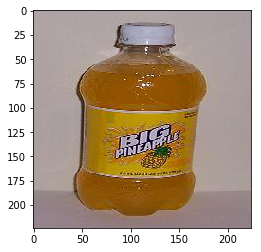

In [21]:
agrh = one_imagenet_setup('./data/data_training/bottle/imagenetbottle2.jpg')
with tf.Session(graph=graph) as sess:
    saver.restore(sess, "./modelTmp/modelTestSaving.ckpt")
    print("Model restored.")
    pred = one_prediction.eval(feed_dict={tf_one_image:agrh})
    max_ind = np.argmax(pred)
    print(max_ind)
    print(classes1[max_ind])
    print(pred)
    print(np.sum(pred))

Class name: bottle
Image index: 1575
INFO:tensorflow:Restoring parameters from ./modelTmp/modelTestSaving.ckpt
Model restored.
(16,)
0
bottle
[[  9.94534492e-01   1.11636291e-04   1.28065163e-04   1.86937505e-05
    7.52344422e-05   2.10857586e-04   2.06974946e-04   3.41158127e-03
    1.29285047e-03   9.37550158e-06]]
1.0


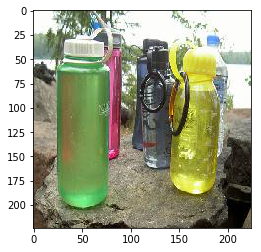

In [17]:
agrh = one_imagenet_setup()
with tf.Session(graph=graph) as sess:
    saver.restore(sess, "./modelTmp/modelTestSaving.ckpt")
    print("Model restored.")
    print(conv1_1_biases.eval().shape)
    pred = one_prediction.eval(feed_dict={tf_one_image:agrh})
    max_ind = np.argmax(pred)
    print(max_ind)
    print(classes1[max_ind])
    print(pred)
    print(np.sum(pred))

Class name: key
Image index: 310
INFO:tensorflow:Restoring parameters from ./modelTmp/modelTestSaving.ckpt
Model restored.
(16,)
3
key
[[  2.82367130e-09   2.43770191e-05   2.37249787e-06   9.96153057e-01
    2.73024256e-07   2.95494247e-04   4.55437856e-07   3.52363009e-03
    6.31945696e-09   3.21091221e-07]]
1.0


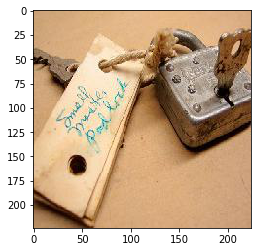

In [127]:
agrh = one_image_setup()
with tf.Session(graph=graph) as sess:
    saver.restore(sess, "./modelTmp/modelTestSaving.ckpt")
    print("Model restored.")
    print(conv1_1_biases.eval().shape)
    pred = one_prediction.eval(feed_dict={tf_one_image:agrh})
    max_ind = np.argmax(pred)
    print(max_ind)
    print(classes1[max_ind])
    print(pred)
    print(np.sum(pred))

In [156]:
def one_camera_setup(path='./ir_nikita/ir_nikita/',name='1.jpg'):
    im = Image.open(path+name).convert('RGB')
    size = training_picture_width,training_picture_height
    im = im.resize(size)
    img_cropped = im.crop((16,16,240,240)) #left,upper,right,bottom pixels of rectangle
    file = path+'/processed/'
    flag_allokwithdir = False
    try:
        os.mkdir(path+'/processed/')
        flag_allokwithdir = True
    except FileExistsError:
        flag_allokwithdir = True
    except:
        flag_allokwithdir = False
    if (flag_allokwithdir):
        file += name
        img_cropped.save(path+'/processed/'+name)
    pixel_depth = 255.0
    batch_data = []
    batch_labels = []
    img = imageio.imread(file).astype(np.float32)
    #display(Image(filename=file))
    plt.imshow(mpimg.imread(file))
    image_data = (img - pixel_depth / 2) / pixel_depth
    batch_data.append(np.array(image_data))
    batch_data = np.array(batch_data)
    return batch_data

In [160]:
classesInfo

{'bottle': [0, 1731],
 'headphones': [1, 865],
 'human': [2, 2526],
 'key': [3, 936],
 'laptop': [4, 1771],
 'pen': [5, 2360],
 'phone': [6, 1473],
 'shoes': [7, 9337],
 'sodacan': [8, 998],
 'wallet': [9, 749]}

In [165]:
def func(path='./highscreen/',name='1.jpg'):
    agrh = one_camera_setup(path=path,name=name)
    with tf.Session(graph=graph) as sess:
        saver.restore(sess, "./modelTmp/modelTestSaving.ckpt")
        print("Model restored.")
        pred = one_prediction.eval(feed_dict={tf_one_image:agrh})
        for k in range(10):
            max_ind = np.argmax(pred)
            print(classes1[max_ind],pred[0,max_ind])
            pred[0,max_ind] = 0.0

INFO:tensorflow:Restoring parameters from ./modelTmp/modelTestSaving.ckpt
Model restored.
pen 0.992923
shoes 0.00480471
bottle 0.00153396
key 0.000690381
human 3.29632e-05
headphones 1.02378e-05
phone 3.3832e-06
sodacan 1.38036e-06
wallet 9.26152e-08
laptop 4.44083e-09


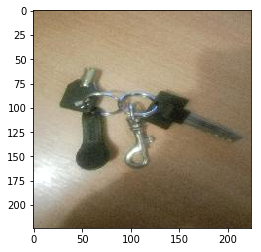

In [166]:
func()

INFO:tensorflow:Restoring parameters from ./modelTmp/modelTestSaving.ckpt
Model restored.
headphones 0.653322
human 0.308578
shoes 0.0226549
phone 0.00972448
pen 0.00372058
bottle 0.00102964
key 0.000490305
laptop 0.00029132
sodacan 0.000125049
wallet 6.38933e-05


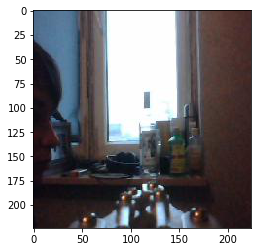

In [167]:
func(path='./ir_nikita/ir_nikita/',name='1.jpg')

INFO:tensorflow:Restoring parameters from ./modelTmp/modelTestSaving.ckpt
Model restored.
human 0.972824
shoes 0.0176054
pen 0.00498145
headphones 0.00172129
bottle 0.0016022
laptop 0.000815406
key 0.000331927
phone 7.84081e-05
sodacan 2.71258e-05
wallet 1.24334e-05


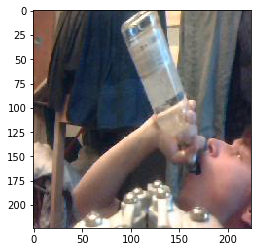

In [168]:
func(path='./ir_nikita/ir_nikita/',name='2.jpg')

INFO:tensorflow:Restoring parameters from ./modelTmp/modelTestSaving.ckpt
Model restored.
human 0.360318
shoes 0.301309
headphones 0.192815
phone 0.0644153
laptop 0.0451838
pen 0.0165251
key 0.0117816
bottle 0.00416617
wallet 0.00269485
sodacan 0.000790833


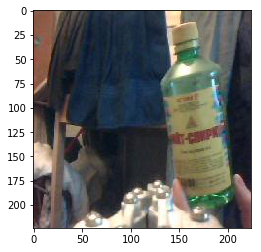

In [169]:
func(path='./ir_nikita/ir_nikita/',name='3.jpg')

INFO:tensorflow:Restoring parameters from ./modelTmp/modelTestSaving.ckpt
Model restored.
human 0.92279
headphones 0.0715849
shoes 0.00500349
laptop 0.000465284
bottle 7.23395e-05
pen 4.46982e-05
key 2.16219e-05
phone 1.71371e-05
wallet 5.51698e-07
sodacan 4.76685e-08


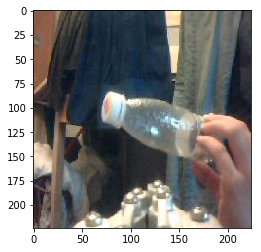

In [170]:
func(path='./ir_nikita/ir_nikita/',name='4.jpg')

INFO:tensorflow:Restoring parameters from ./modelTmp/modelTestSaving.ckpt
Model restored.
human 0.977756
shoes 0.0117686
headphones 0.00723661
key 0.00239387
bottle 0.000459194
phone 0.000163797
sodacan 9.73895e-05
pen 9.70641e-05
laptop 2.69741e-05
wallet 4.51244e-07


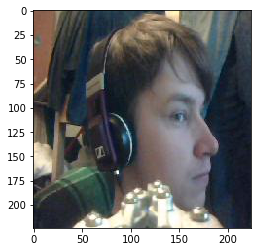

In [171]:
func(path='./ir_nikita/ir_nikita/',name='5.jpg')

INFO:tensorflow:Restoring parameters from ./modelTmp/modelTestSaving.ckpt
Model restored.
human 0.713388
shoes 0.140289
laptop 0.0900246
headphones 0.038402
bottle 0.00726583
phone 0.00560596
key 0.00326414
wallet 0.000684675
sodacan 0.000555396
pen 0.000520757


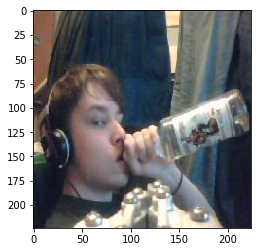

In [172]:
func(path='./ir_nikita/ir_nikita/',name='6.jpg')

INFO:tensorflow:Restoring parameters from ./modelTmp/modelTestSaving.ckpt
Model restored.
human 0.996322
headphones 0.00199991
shoes 0.0010738
bottle 0.000183752
phone 0.000140183
laptop 0.000111729
key 0.000105726
pen 4.21095e-05
sodacan 1.98962e-05
wallet 1.16854e-06


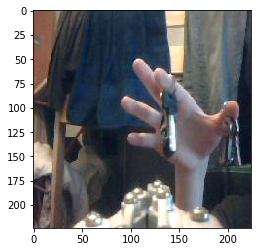

In [173]:
func(path='./ir_nikita/ir_nikita/',name='7.jpg')

INFO:tensorflow:Restoring parameters from ./modelTmp/modelTestSaving.ckpt
Model restored.
human 0.366862
bottle 0.366611
shoes 0.162281
headphones 0.0769297
pen 0.0136266
sodacan 0.00447821
wallet 0.00374737
phone 0.00314892
laptop 0.00130317
key 0.00101259


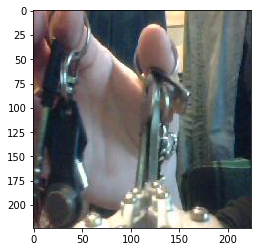

In [174]:
func(path='./ir_nikita/ir_nikita/',name='8.jpg')

INFO:tensorflow:Restoring parameters from ./modelTmp/modelTestSaving.ckpt
Model restored.
human 0.945636
shoes 0.030588
headphones 0.0184259
bottle 0.00267516
key 0.00134652
laptop 0.000802763
phone 0.000355735
pen 0.000124794
sodacan 4.44691e-05
wallet 5.87605e-07


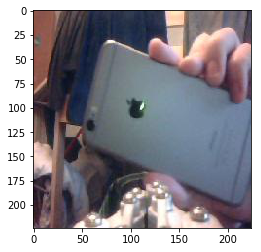

In [175]:
func(path='./ir_nikita/ir_nikita/',name='9.jpg')

INFO:tensorflow:Restoring parameters from ./modelTmp/modelTestSaving.ckpt
Model restored.
human 0.964428
shoes 0.0145641
sodacan 0.00630432
bottle 0.00396651
headphones 0.00380866
phone 0.00283586
laptop 0.00225046
key 0.00110521
pen 0.000585897
wallet 0.000150815


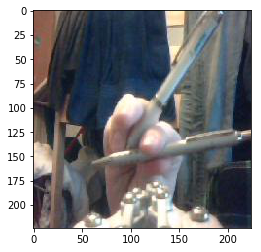

In [176]:
func(path='./ir_nikita/ir_nikita/',name='10.jpg')

INFO:tensorflow:Restoring parameters from ./modelTmp/modelTestSaving.ckpt
Model restored.
human 0.366345
shoes 0.260065
headphones 0.185789
phone 0.103477
laptop 0.0487176
bottle 0.0176789
key 0.0151129
sodacan 0.00133625
wallet 0.000874591
pen 0.000604971


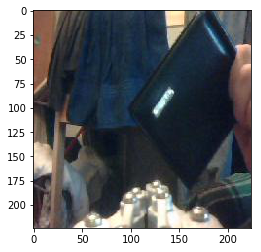

In [177]:
func(path='./ir_nikita/ir_nikita/',name='11.jpg')

INFO:tensorflow:Restoring parameters from ./modelTmp/modelTestSaving.ckpt
Model restored.
laptop 0.646145
human 0.22734
phone 0.0463441
headphones 0.0384166
shoes 0.0334294
pen 0.00418112
key 0.00226723
bottle 0.000976777
wallet 0.000620377
sodacan 0.000279088


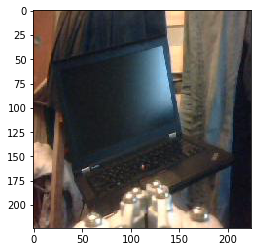

In [178]:
func(path='./ir_nikita/ir_nikita/',name='12.jpg')

INFO:tensorflow:Restoring parameters from ./modelTmp/modelTestSaving.ckpt
Model restored.
human 0.770483
shoes 0.0912148
headphones 0.0809472
laptop 0.0412193
bottle 0.0122167
phone 0.0022064
sodacan 0.000633826
wallet 0.000490666
key 0.000479247
pen 0.000108892


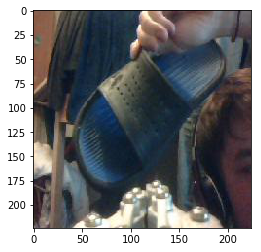

In [179]:
func(path='./ir_nikita/ir_nikita/',name='13.jpg')

INFO:tensorflow:Restoring parameters from ./modelTmp/modelTestSaving.ckpt
Model restored.
human 0.569263
shoes 0.22958
laptop 0.164993
headphones 0.0224525
bottle 0.0128602
pen 0.000656858
key 9.87861e-05
sodacan 7.60535e-05
phone 1.88471e-05
wallet 1.00273e-06


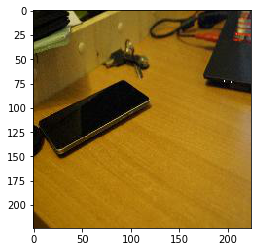

In [181]:
func(path='./photocamera/',name='_DSC1566.jpg')

INFO:tensorflow:Restoring parameters from ./modelTmp/modelTestSaving.ckpt
Model restored.
key 0.753511
shoes 0.148253
phone 0.076773
laptop 0.0124991
wallet 0.00447965
headphones 0.00390046
human 0.000209572
pen 0.000141756
sodacan 0.000121373
bottle 0.000110831


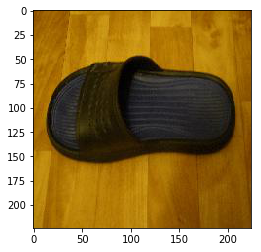

In [182]:
func(path='./photocamera/',name='_DSC1567.jpg')

INFO:tensorflow:Restoring parameters from ./modelTmp/modelTestSaving.ckpt
Model restored.
shoes 0.49353
phone 0.261268
key 0.183184
headphones 0.0359478
pen 0.0177365
wallet 0.00365721
sodacan 0.00237599
human 0.00156454
bottle 0.000683867
laptop 5.25376e-05


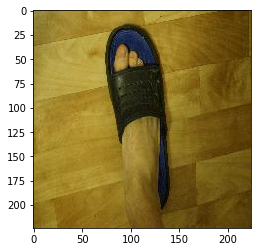

In [183]:
func(path='./photocamera/',name='_DSC1568.jpg')

INFO:tensorflow:Restoring parameters from ./modelTmp/modelTestSaving.ckpt
Model restored.
shoes 0.522313
phone 0.35896
wallet 0.0935034
laptop 0.0243743
pen 0.000695331
headphones 0.000102276
key 5.00621e-05
bottle 1.76371e-06
sodacan 5.85025e-08
human 5.56615e-09


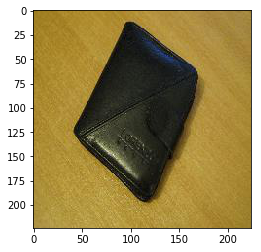

In [184]:
func(path='./photocamera/',name='_DSC1569.jpg')

INFO:tensorflow:Restoring parameters from ./modelTmp/modelTestSaving.ckpt
Model restored.
key 0.875237
shoes 0.0619444
pen 0.0582753
headphones 0.00216901
human 0.00108392
bottle 0.000892537
phone 0.000286686
sodacan 7.0479e-05
wallet 2.31418e-05
laptop 1.73269e-05


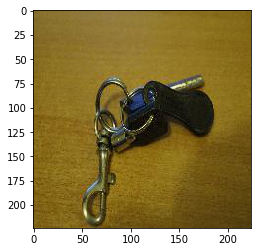

In [185]:
func(path='./photocamera/',name='_DSC1570.jpg')

INFO:tensorflow:Restoring parameters from ./modelTmp/modelTestSaving.ckpt
Model restored.
pen 0.999995
shoes 4.59461e-06
key 1.60199e-08
wallet 1.4266e-09
phone 1.60324e-11
laptop 4.01477e-12
bottle 1.60184e-12
headphones 1.78904e-13
sodacan 5.52067e-14
human 1.44594e-14


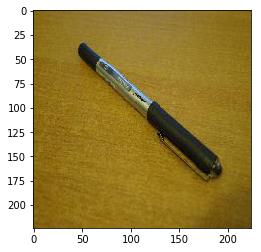

In [186]:
func(path='./photocamera/',name='_DSC1571.jpg')

INFO:tensorflow:Restoring parameters from ./modelTmp/modelTestSaving.ckpt
Model restored.
bottle 0.98208
shoes 0.0120883
pen 0.00412784
key 0.000785989
sodacan 0.000515521
human 0.000227168
wallet 0.000137196
phone 3.35441e-05
headphones 3.36859e-06
laptop 1.24548e-06


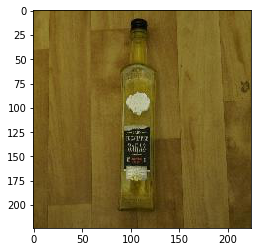

In [187]:
func(path='./photocamera/',name='_DSC1572.jpg')